In [58]:
from pyscenic.rss import regulon_specificity_scores

In [59]:
from pyscenic.plotting import plot_rss
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyscenic.binarization import binarize
import scanpy as sc
from adjustText import adjust_text

In [60]:
adata_scenic = sc.read("/home/spuccio/isilon/spuccio/SP028_Autoimmunity/h5_files/CD4/CD4_res06_cariplo.h5ad")

In [61]:
auc_mtx = pd.read_csv("/home/spuccio/data/auc_mtx_CD4_imputed.csv",header=0,sep=",")

In [62]:
tmp1 = pd.merge(adata_scenic.obs['desc_0.6'],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [63]:
tmp2 = pd.merge(adata_scenic.obs['TumorType'],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [64]:
tmp3 = pd.merge(adata_scenic.obs[['desc_0.6','TumorType']],auc_mtx.set_index(['Cell']),left_index=True, right_index=True)

In [65]:
tmp1 = tmp1.set_index(['desc_0.6'])

In [66]:
tmp2 = tmp2.set_index(['TumorType'])

In [67]:
tmp3 = auc_mtx.set_index([adata_scenic.obs[['desc_0.6','TumorType']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)])

In [68]:
rss_cellType_tmp1 = regulon_specificity_scores( tmp1, tmp1.index)

In [69]:
rss_cellType_tmp1.T.dropna().to_csv("/home/spuccio/data/all_regulons_cluster.csv",sep="\t",header=True, index=True)

In [70]:
rss_cellType_tmp1

,ACAA1(-),ACO1(+),ADNP2(-),AEBP2(+),AEBP2(-),AHCTF1(+),AHR(+),AHR(-),AHRR(+),AHRR(-),...,ZSCAN29(+),ZSCAN29(-),ZSCAN30(+),ZSCAN30(-),ZSCAN9(+),ZXDA(+),ZXDA(-),ZXDB(-),ZXDC(+),ZXDC(-)
2,0.385913,NaN,0.423019,0.418101,0.379095,NaN,0.405671,0.373034,0.538007,0.364430,...,NaN,NaN,0.380997,0.410262,NaN,0.352609,0.412190,NaN,0.388469,0.417253
1,0.390029,NaN,0.312290,0.363899,0.372256,NaN,0.389145,0.398222,0.272164,0.404915,...,NaN,NaN,0.402941,0.350274,NaN,0.413330,0.327211,NaN,0.397321,0.366439
4,0.251515,NaN,0.259265,0.252039,0.252245,NaN,0.254446,0.254518,0.274975,0.251585,...,NaN,NaN,0.253423,0.256599,NaN,0.257774,0.257077,NaN,0.248532,0.249721
5,0.301628,NaN,0.317377,0.301779,0.293001,NaN,0.303630,0.297421,0.281742,0.290264,...,NaN,NaN,0.295599,0.315787,NaN,0.265023,0.307862,NaN,0.296090,0.316334
0,0.250280,NaN,0.232501,0.244560,0.258407,NaN,0.238361,0.253095,0.243255,0.253674,...,NaN,NaN,0.248793,0.250348,NaN,0.257679,0.253568,NaN,0.244783,0.246747
3,0.232503,NaN,0.287347,0.239900,0.233049,NaN,0.232529,0.222175,0.215127,0.232098,...,NaN,NaN,0.219774,0.263392,NaN,0.224330,0.260596,NaN,0.233176,0.241626
6,0.317064,NaN,0.270109,0.306814,0.336966,NaN,0.295322,0.327514,0.199675,0.329609,...,NaN,NaN,0.319907,0.282406,NaN,0.340699,0.303754,NaN,0.313833,0.286940


In [72]:
#cols = [c for c in rss_cellType_tmp1.columns if c[:3] != 'ZNF']

In [73]:
#rss_cellType_tmp1_=rss_cellType_tmp1[cols]

### RSS panel plot with all cell types

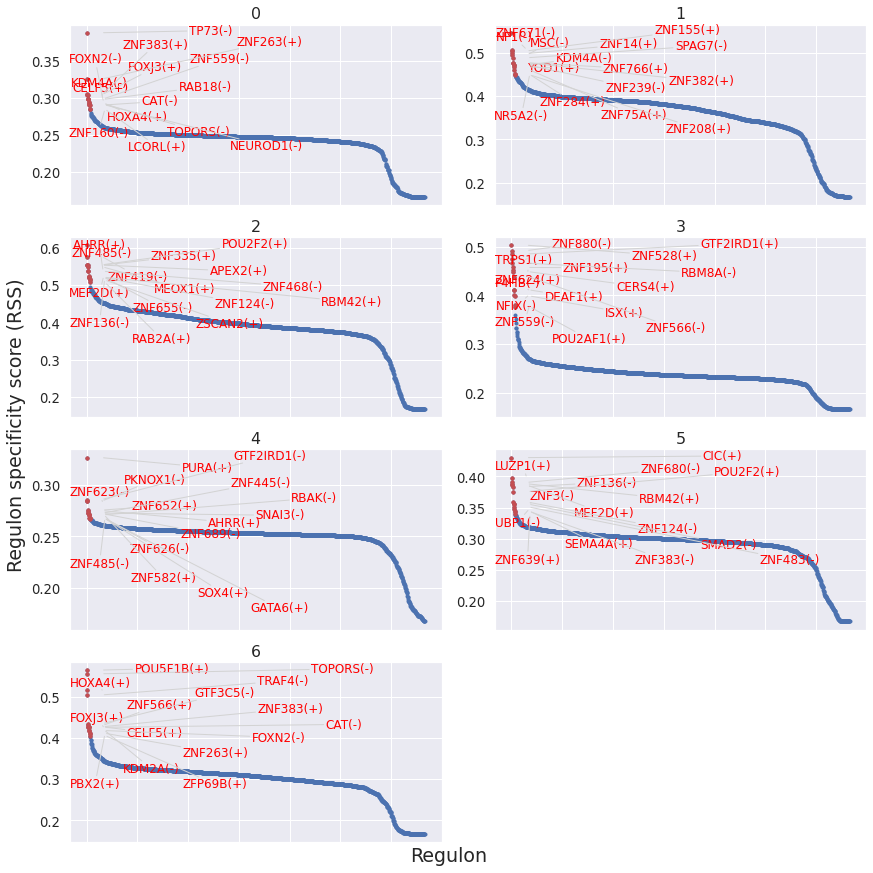

In [74]:
from adjustText import adjust_text
cats = sorted(list(set(tmp1.index)))
fig = plt.figure(figsize=(12, 12))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp1.T[c]
    ax = fig.add_subplot(4,2,num)
    plot_rss(rss_cellType_tmp1, c, top_n=15, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Select the top 20 regulons from each cell type

In [75]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType_tmp1.T[c].sort_values(ascending=False)[:20].index)
    )
topreg = list(set(topreg))

In [76]:
auc_mtx_Z = pd.DataFrame( index=tmp1.index )
for col in list(tmp1.columns):
    auc_mtx_Z[ col ] = ( tmp1[col] - tmp1[col].mean()) / tmp1[col].std(ddof=0)

### Generate a heatmap

In [77]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [78]:
colors = sns.color_palette('bright',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in tmp1.index ]

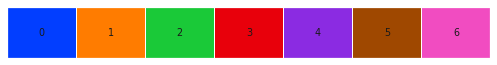

In [79]:
import numpy as np
import matplotlib as mpl
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("/home/spuccio/data/regulon_scale_imputed.pdf", dpi=600, bbox_inches = "tight")

In [80]:
auc_mtx_Z[topreg]

,ZNF562(+),ZNF468(-),ZNF208(+),ZNF623(-),ZNF841(+),ZNF3(-),SEMA4A(+),POU2AF1(+),PBX2(+),RBAK(-),...,ZNF528(+),ZNF582(+),ZNF566(-),ZNF652(+),ATF2(-),NR1I3(-),KDM2A(-),KDM4A(-),CIC(+),GATA6(+)
desc_0.6,,,,,,,,,,,,,,,,,,,,,
2,-1.274799,1.061905,-0.611657,-0.130835,1.679724,0.853760,0.757158,-0.738248,-1.145441,1.174800,...,-0.247226,-0.753548,-0.203335,0.849912,-0.148049,1.831778,-0.607744,-1.062074,-0.514488,-0.599260
1,-1.095079,-0.604566,1.380002,-0.130835,1.412163,-0.264957,-0.969109,0.439455,0.534009,0.548358,...,-0.247226,0.346461,-0.203335,1.399509,-0.770101,0.678653,-0.607744,1.147187,-0.514488,-0.821937
2,-0.357284,0.595858,0.621117,-0.130835,-0.062857,0.609677,0.024112,-0.811502,-1.088751,0.524719,...,-0.247226,-0.523875,-0.203335,-0.524079,0.142839,-0.199004,-0.607744,0.715117,-0.514488,-0.280200
1,1.307484,-0.865835,0.929310,-0.130835,-0.858681,0.040148,-1.145724,-0.062055,1.008790,-0.716345,...,-0.247226,0.930715,-0.203335,-0.554612,0.500854,-1.191973,-0.607744,0.918924,-0.514488,0.038860
2,-1.274799,1.337297,-1.619085,-0.130835,0.986808,0.711378,1.805453,-0.614279,-1.145441,1.450592,...,-0.247226,-0.209587,-0.203335,1.292643,0.317371,1.027794,-0.607744,-1.062074,0.646756,1.195452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.654819,-0.865835,1.184481,-0.130835,-0.858681,0.175750,-1.126733,-0.726978,1.419795,0.721713,...,-0.207626,1.809110,-0.203335,-0.554612,-0.139099,-0.660254,-0.607744,1.212405,-0.514488,-0.133964
2,-0.404579,1.838651,-1.672108,-0.130835,-0.117741,-0.719224,0.924278,0.309851,-1.145441,0.768992,...,-0.247226,1.490793,-0.203335,0.727780,-0.336007,2.062404,-0.607744,-1.062074,-0.514488,1.913337
4,0.825079,-0.865835,0.866346,-0.130835,-0.858681,0.704598,-1.151421,-0.687533,1.122171,0.946287,...,-0.247226,1.474675,-0.203335,-0.554612,0.702238,-1.006192,-0.607744,0.764031,-0.514488,0.251567


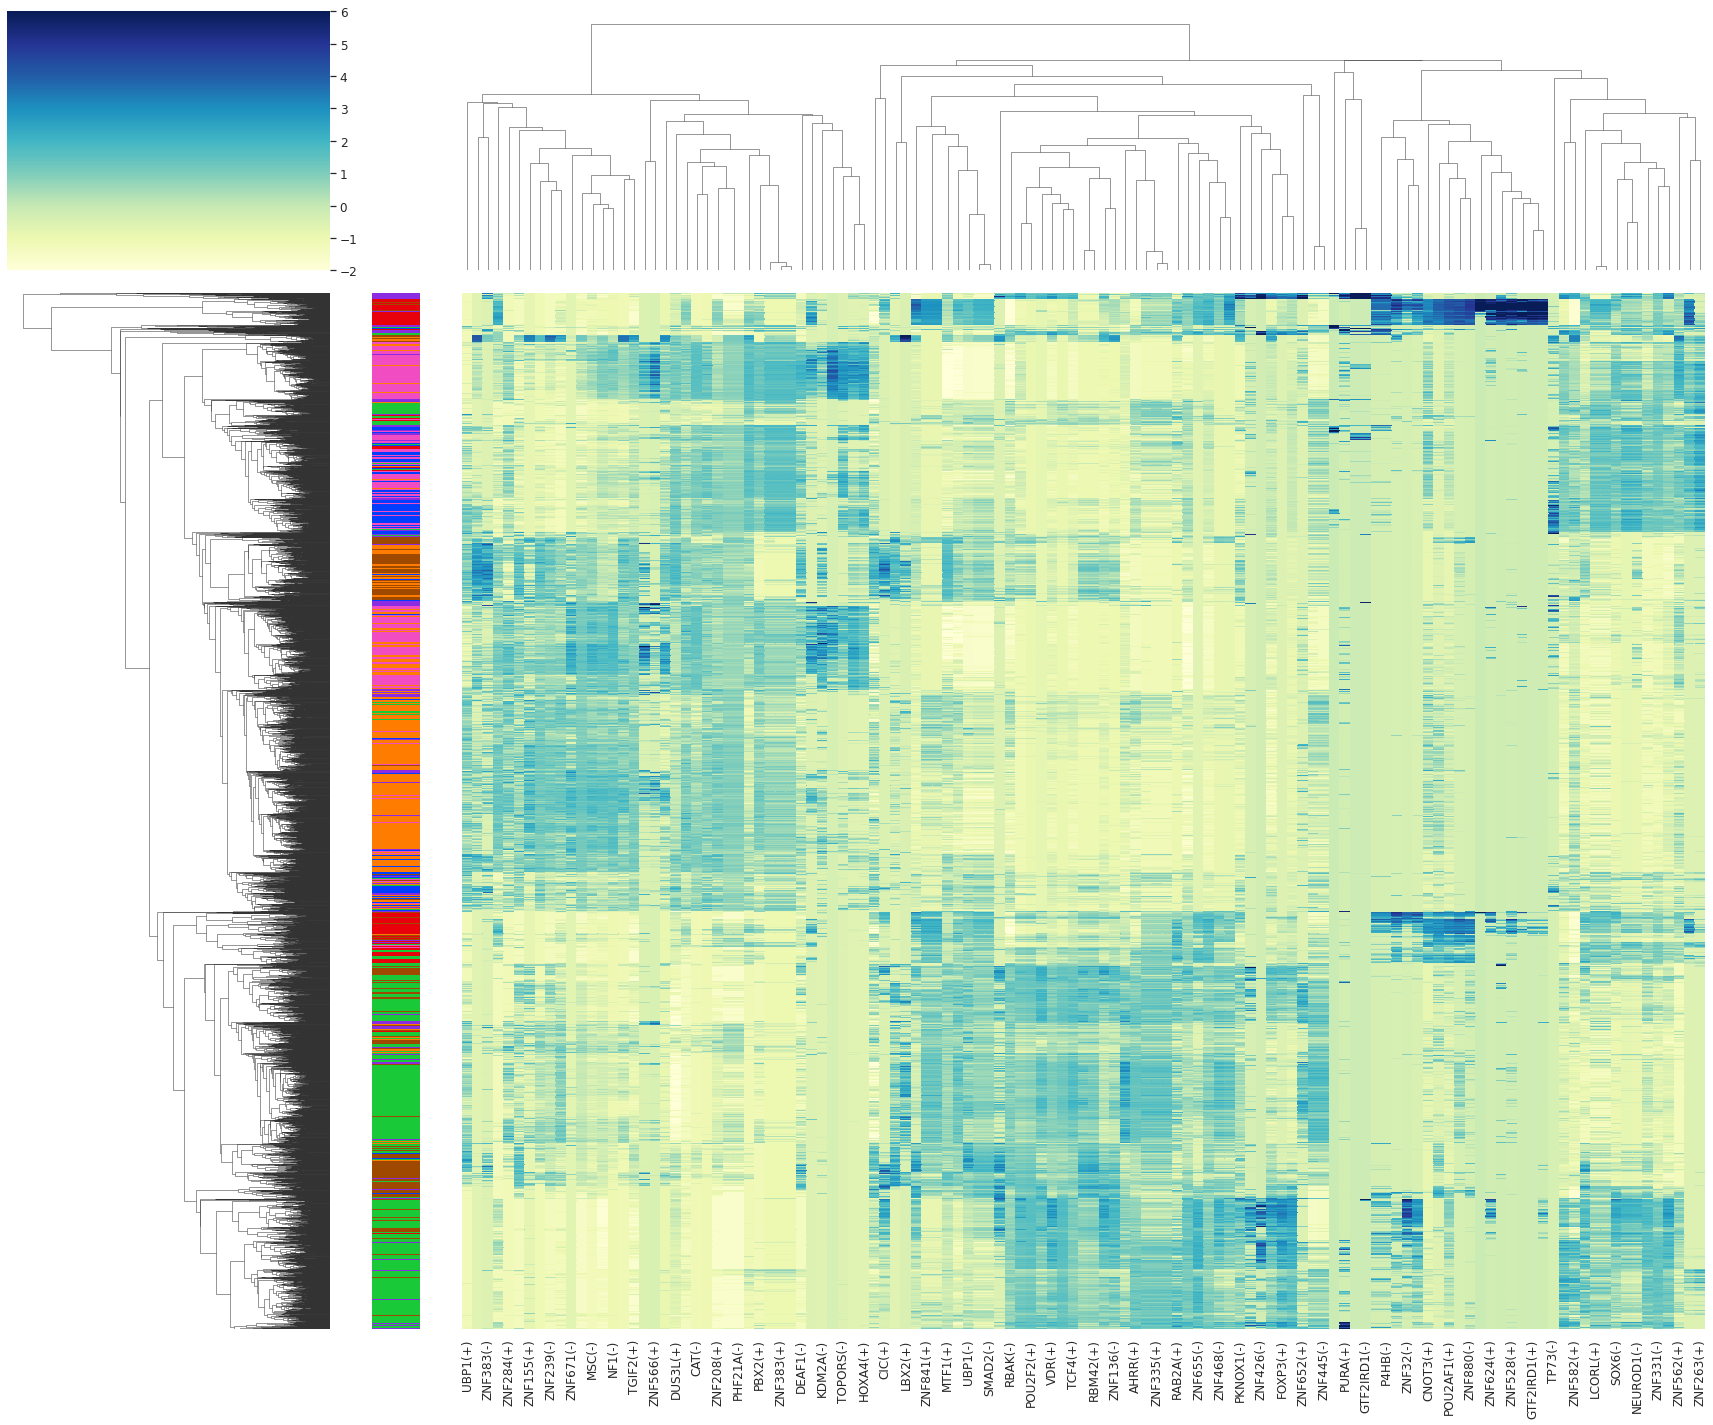

In [81]:
sns.set(font_scale=1.1)
g = sns.clustermap(auc_mtx_Z[topreg],  linecolor='gray',
    yticklabels=False, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(24,20) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("/home/spuccio/data/regulon_imputed_3.pdf", dpi=600, bbox_inches = "tight")

In [82]:
del tmp3['Cell']

In [83]:
rss_cellType_tmp3 = regulon_specificity_scores( tmp3, tmp3.index)

In [84]:
rss_cellType_tmp3.T.dropna().to_csv("/home/spuccio/data/all_regulons_cluster_disease.csv",sep="\t",header=True, index=True)

from adjustText import adjust_text
cats = sorted(list(set(tmp3.index)))
fig = plt.figure(figsize=(14, 14))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.T[c]
    ax = fig.add_subplot(8,2,num)
    plot_rss(rss_cellType_tmp3, c, top_n=15, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed2.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 0 - 1

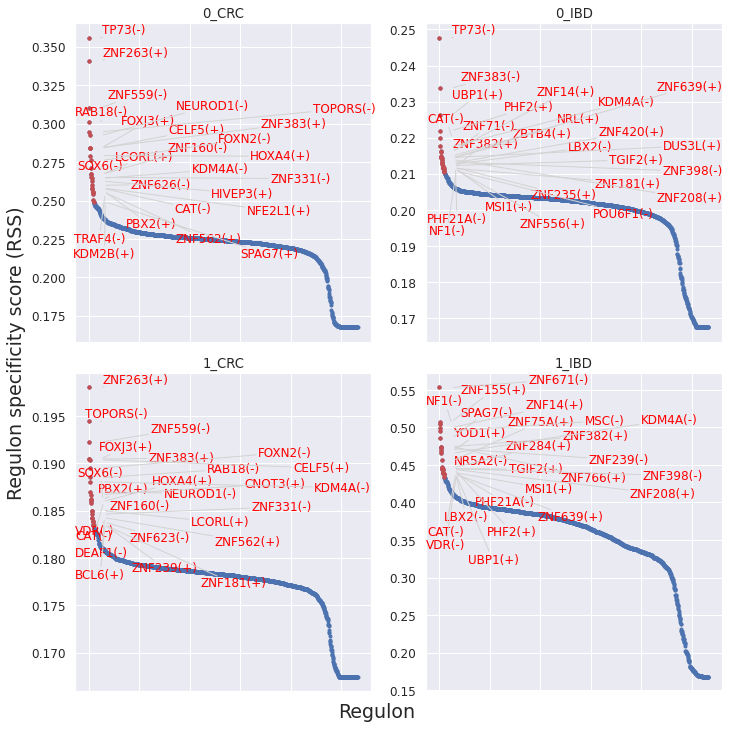

In [32]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "0_IBD") | (rss_cellType_tmp3.index == "0_CRC") | (rss_cellType_tmp3.index == "1_IBD") | (rss_cellType_tmp3.index == "1_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C0_1.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 2 - 3

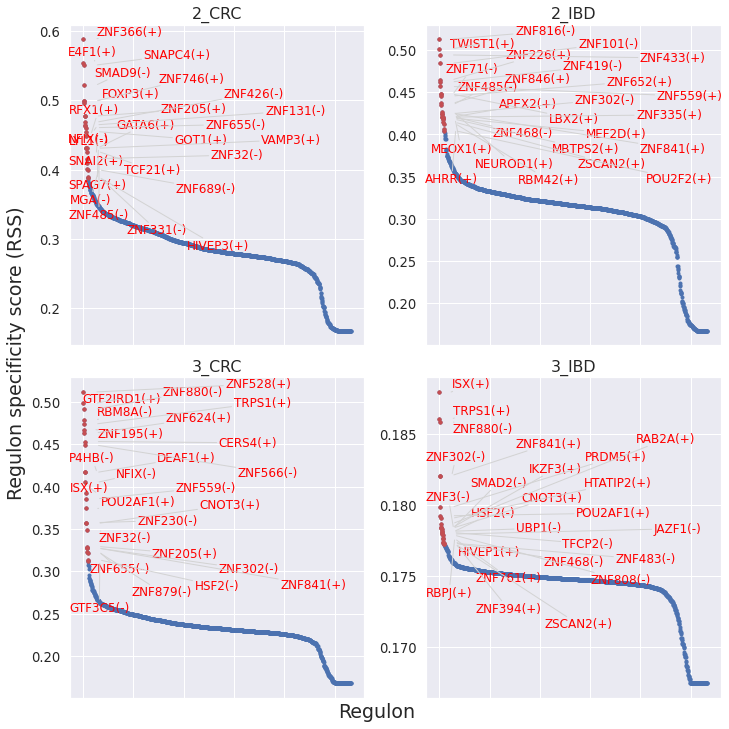

In [33]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "2_IBD") | (rss_cellType_tmp3.index == "2_CRC") | (rss_cellType_tmp3.index == "3_IBD") | (rss_cellType_tmp3.index == "3_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C2_3.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 4 - 5

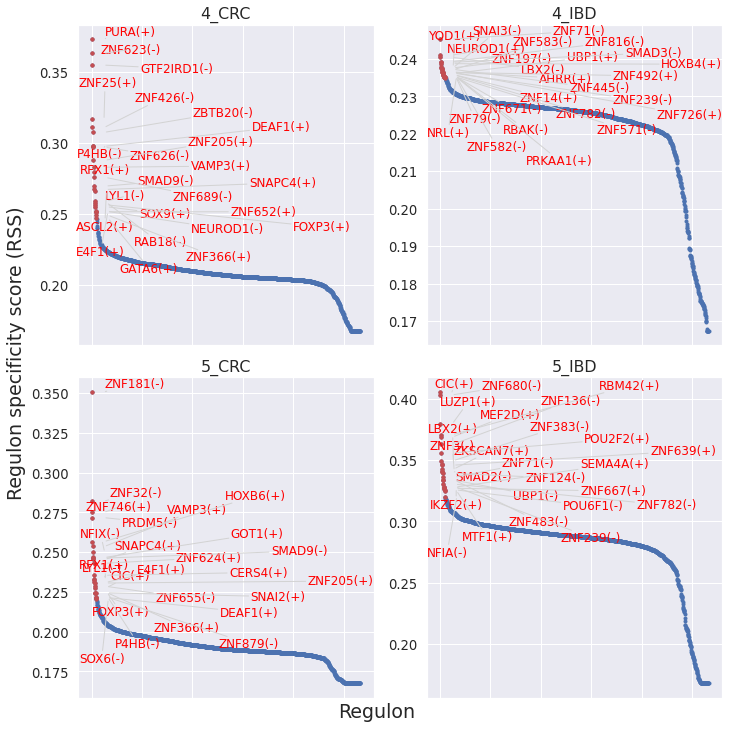

In [34]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "4_IBD") | (rss_cellType_tmp3.index == "4_CRC") | (rss_cellType_tmp3.index == "5_IBD") | (rss_cellType_tmp3.index == "5_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C4_5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Cluster 6 - 7 

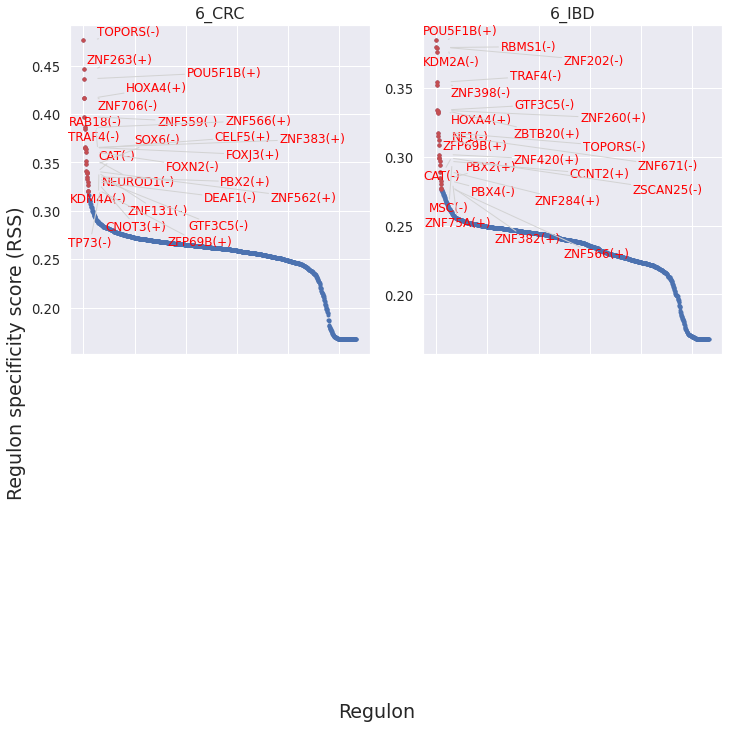

In [35]:
from adjustText import adjust_text
cats = sorted(list(set(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC")].index)))
fig = plt.figure(figsize=(10, 10))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC")].T[c]
    ax = fig.add_subplot(2,2,num)
    plot_rss(rss_cellType_tmp3.loc[(rss_cellType_tmp3.index == "6_IBD") | (rss_cellType_tmp3.index == "6_CRC")], c, top_n=25, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("/home/spuccio/data/regulon_imputed_C6_7.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [85]:
#sc.pp.scale(adata_scenic, max_value=6)

In [86]:
adata_scenic.obs['desc_0.6'] = adata_scenic.obs['desc_0.6'].astype('category')

In [87]:
adata_scenic.raw = adata_scenic

In [88]:
sc.tl.rank_genes_groups(adata_scenic, 'desc_0.6', method='wilcoxon',use_raw=True,pts=False)
pd.DataFrame(adata_scenic.uns['rank_genes_groups']['names']).head(20)

,0,1,2,3,4,5,6
0,CD52,EEF1A1,BATF,CXCL13,CD3E,CREM,CCR7
1,ANXA1,TPT1,IL32,NR3C1,B2M,DUSP4,SELL
2,S100A6,BTG1,PRDM1,FKBP5,TMSB4X,UBC,FOS
3,S100A4,TMSB4X,CTSC,TOX2,HLA-A,DUSP2,NOSIP
4,S100A11,UBA52,SAT1,BTLA,HLA-B,EZR,EEF1B2
5,VIM,EEF1B2,PMAIP1,SLA,TMSB10,COTL1,PABPC1
6,FOS,FAU,S100A4,PDCD1,ACTB,ISG20,TXNIP
7,JUN,PTMA,TNFRSF18,ITM2A,PTMA,PIM3,EIF3E
8,S100A10,EEF1D,BTG3,RBPJ,BTG1,MCL1,LDHB
9,CD99,CXCR4,FOXP3,CORO1B,EEF1A1,REL,CD48


In [90]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']}).to_csv("/home/spuccio/data/Data_integrated_Res06_3.csv",header=True,index=False)


In [94]:
adata_subset = adata_scenic[adata_scenic.obs['desc_0.6'].isin([2])]

In [97]:
sc.tl.rank_genes_groups(adata_subset, 'TumorType', method='wilcoxon',use_raw=True,pts=False)
pd.DataFrame(adata_subset.uns['rank_genes_groups']['names']).head(20)

,CRC,IBD
0,S100A11,TPT1
1,JUN,B2M
2,FOS,TMSB4X
3,HSPA1A,SRGN
4,DNPH1,EEF1A1
5,HLA-DRB1,BTG1
6,NDUFA13,PTMA
7,PLP2,RGS1
8,LGALS3,EIF1
9,HSPA1B,EEF1D


In [99]:
result = adata_subset.uns['rank_genes_groups']

In [100]:
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']}).to_csv("/home/spuccio/data/Data_integrated_Res06_onlycluster2.csv",header=True,index=False)


In [103]:
import scanpy.external as sce

In [104]:
sce.pp.magic(adata_subset, name_list='all_genes', knn=5)

/home/spuccio/.local/lib/python3.7/site-packages/magic_impute-2.0.3-py3.7.egg/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.


  Running MAGIC with `solver='exact'` on 14458-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


In [106]:
adata_subset.to_df().to_csv("/home/spuccio/data/cluster2.csv",sep="\t",header=True,index=True)

In [109]:
adata_subset.obs['TumorType'].to_csv("/home/spuccio/data/cluster2_meta.csv",sep="\t",header=False,index=True)